In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

telemetry = pd.read_csv('PdM_telemetry.csv')
errors = pd.read_csv('PdM_errors.csv')
maint = pd.read_csv('PdM_maint.csv')
failures = pd.read_csv('PdM_failures.csv')
machines = pd.read_csv('PdM_machines.csv')

In [269]:
na_df=pd.DataFrame(failures.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount


In [270]:
na_df=pd.DataFrame(errors.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount


In [271]:
na_df=pd.DataFrame(telemetry.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount


In [272]:
na_df=pd.DataFrame(maint.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount


In [55]:
na_df=pd.DataFrame(machines.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount


In [273]:
failures.shape

(761, 3)

In [274]:
errors.shape

(3919, 3)

In [275]:
telemetry.shape

(876100, 6)

In [276]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [277]:
failures = failures.set_index('datetime')
failures.head()

,machineID,failure
datetime,,
2015-01-05 06:00:00,1,comp4
2015-03-06 06:00:00,1,comp1
2015-04-20 06:00:00,1,comp2
2015-06-19 06:00:00,1,comp4
2015-09-02 06:00:00,1,comp4


In [278]:
failures['datetime'] = pd.to_datetime(failures.index.values)

In [279]:
failures.index = pd.to_datetime(failures.index.values)

In [280]:
failures.head()

,machineID,failure,datetime
2015-01-05 06:00:00,1,comp4,2015-01-05 06:00:00
2015-03-06 06:00:00,1,comp1,2015-03-06 06:00:00
2015-04-20 06:00:00,1,comp2,2015-04-20 06:00:00
2015-06-19 06:00:00,1,comp4,2015-06-19 06:00:00
2015-09-02 06:00:00,1,comp4,2015-09-02 06:00:00


In [281]:
failures['weekday'] = failures['datetime'].dt.weekday.replace(dict(zip(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split())))
failures.head()

,machineID,failure,datetime,weekday
2015-01-05 06:00:00,1,comp4,2015-01-05 06:00:00,Mon
2015-03-06 06:00:00,1,comp1,2015-03-06 06:00:00,Fri
2015-04-20 06:00:00,1,comp2,2015-04-20 06:00:00,Mon
2015-06-19 06:00:00,1,comp4,2015-06-19 06:00:00,Fri
2015-09-02 06:00:00,1,comp4,2015-09-02 06:00:00,Wed


In [282]:
failures = pd.get_dummies(failures,columns=['weekday'])
failures.head()


,machineID,failure,datetime,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
2015-01-05 06:00:00,1,comp4,2015-01-05 06:00:00,0,1,0,0,0,0,0
2015-03-06 06:00:00,1,comp1,2015-03-06 06:00:00,1,0,0,0,0,0,0
2015-04-20 06:00:00,1,comp2,2015-04-20 06:00:00,0,1,0,0,0,0,0
2015-06-19 06:00:00,1,comp4,2015-06-19 06:00:00,1,0,0,0,0,0,0
2015-09-02 06:00:00,1,comp4,2015-09-02 06:00:00,0,0,0,0,0,0,1


In [283]:
X = failures[[c for c in failures.columns if c.startswith('week')]] 
y = failures['failure']
print(X)

                     weekday_Fri  weekday_Mon  weekday_Sat  weekday_Sun  \
2015-01-05 06:00:00            0            1            0            0   
2015-03-06 06:00:00            1            0            0            0   
2015-04-20 06:00:00            0            1            0            0   
2015-06-19 06:00:00            1            0            0            0   
2015-09-02 06:00:00            0            0            0            0   
2015-10-17 06:00:00            0            0            1            0   
2015-12-16 06:00:00            0            0            0            0   
2015-03-19 06:00:00            0            0            0            0   
2015-03-19 06:00:00            0            0            0            0   
2015-04-18 06:00:00            0            0            1            0   
2015-12-29 06:00:00            0            0            0            0   
2015-01-07 06:00:00            0            0            0            0   
2015-02-06 06:00:00      

In [284]:
print(y)

2015-01-05 06:00:00    comp4
2015-03-06 06:00:00    comp1
2015-04-20 06:00:00    comp2
2015-06-19 06:00:00    comp4
2015-09-02 06:00:00    comp4
2015-10-17 06:00:00    comp2
2015-12-16 06:00:00    comp4
2015-03-19 06:00:00    comp1
2015-03-19 06:00:00    comp2
2015-04-18 06:00:00    comp2
2015-12-29 06:00:00    comp2
2015-01-07 06:00:00    comp2
2015-02-06 06:00:00    comp1
2015-07-21 06:00:00    comp2
2015-10-04 06:00:00    comp2
2015-12-03 06:00:00    comp2
2015-01-17 06:00:00    comp2
2015-02-16 06:00:00    comp1
2015-04-02 06:00:00    comp2
2015-07-16 06:00:00    comp2
2015-08-30 06:00:00    comp1
2015-10-14 06:00:00    comp2
2015-01-09 06:00:00    comp2
2015-02-23 06:00:00    comp1
2015-04-09 06:00:00    comp1
2015-06-23 06:00:00    comp2
2015-09-06 06:00:00    comp1
2015-10-06 06:00:00    comp2
2015-11-20 06:00:00    comp1
2015-01-24 06:00:00    comp2
                       ...  
2015-06-14 06:00:00    comp2
2015-06-29 06:00:00    comp1
2015-06-29 06:00:00    comp4
2015-07-29 06:

In [285]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')

model.fit(X= X, y = y)
model.score(X,y)

0.3324572930354796

In [286]:
sum(model.predict(X) == failures['failure'])/len(failures)

0.3324572930354796

In [287]:
model.predict_proba(X)

array([[0.22257728, 0.24332948, 0.25933087, 0.27476237],
       [0.2954588 , 0.17640511, 0.28503665, 0.24309943],
       [0.22257728, 0.24332948, 0.25933087, 0.27476237],
       ...,
       [0.30525284, 0.27251119, 0.21176357, 0.2104724 ],
       [0.30525284, 0.27251119, 0.21176357, 0.2104724 ],
       [0.19134231, 0.30325393, 0.24126003, 0.26414373]])

In [291]:
model.coef_

array([[ 0.18507848, -0.11601769, -0.05683493, -0.01715404,  0.20855438,
         0.05371345, -0.25725713],
       [-0.33726616, -0.02974746, -0.2158    ,  0.22088088,  0.09329484,
         0.06705276,  0.20213975],
       [ 0.15801248,  0.04705756,  0.12386708, -0.21328307, -0.14318744,
         0.04116182, -0.01421116],
       [-0.0058248 ,  0.09870759,  0.14876784,  0.00955624, -0.15866178,
        -0.16192802,  0.06932853]])

In [292]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X= X, y = y)
model.score(X,y)

0.3508541392904074

In [293]:
sum(model.predict(X) == failures['failure'])/len(failures)

0.3508541392904074

In [294]:
model.predict_proba(X)

array([[0.22626764, 0.33361144, 0.17975899, 0.26036193],
       [0.3099703 , 0.24866834, 0.20361556, 0.23774581],
       [0.22626764, 0.33361144, 0.17975899, 0.26036193],
       ...,
       [0.30092491, 0.36270485, 0.14287101, 0.19349923],
       [0.30092491, 0.36270485, 0.14287101, 0.19349923],
       [0.18908212, 0.40487018, 0.1627232 , 0.24332451]])

In [297]:
pd.to_datetime('12/15/2021').weekday()

2

In [296]:
# Merge falures with PDM_errors
inner_merged = pd.merge(failures, errors , on=['datetime', 'machineID'], how='inner')


In [298]:
def findpriorerrorGOOD(target, df_errors):
    #print( df_errors[df_errors["machineID"] == target["machineID"]])
    #print(df_errors[df_errors["machineID"]])
    #print(target["machineID"])
    prior_error = dict() 
    machine_errors = df_errors[df_errors["machineID"] == target["machineID"]]
    machine_errors = machine_errors.sort_values("datetime")
    machine_errors = machine_errors.reset_index()
    for i,row in machine_errors.iterrows():
        #print(i)
        #print(target["datetime"])
        #print(machine_errors["datetime"])
        #print(target["datetime"] >= machine_errors["datetime"])
        if i and target["datetime"] >= row["datetime"]:
            prior_error = machine_errors.iloc[i-1].to_dict()
    del prior_error["index"]
    print(prior_error)
    return prior_error

In [299]:
def findpriorerror(target, df_errors):

    prior_error = dict() 
    machine_errors = df_errors[df_errors["machineID"] == target["machineID"]]
    machine_errors = machine_errors.sort_values("datetime")
    machine_errors = machine_errors.reset_index()
    for i,row in machine_errors.iterrows():
        #print( row["datetime"])       
        if i and target["datetime"] >= row["datetime"].to_pydatetime():
            
            prior_error = machine_errors.iloc[i-1].to_dict()
    
    del prior_error["index"]
    print(prior_error)
    return prior_error

In [300]:
test = errors.iloc[0].to_dict()
test["machineID"]
print(test["machineID"])

1


In [304]:
for i,row in failures.iterrows():
    row["datetime"]= row["datetime"].todate
    findpriorerror(row.to_dict(),df_errors = errors) 
    break

AttributeError: 'Timestamp' object has no attribute 'todate'

In [305]:
>>> target = dict(datetime = "2015-01-05 06:00:00", machineID = 1, failure= "comp4")
>>> target1 = dict(datetime = "2015-03-19 06:00:00", machineID = 2, failure= "comp1")
>>> prior_error = dict(datetime = "2015-01-03 20:00:00", machineID = 1, errorID = "error3")
>>> print(prior_error)
>>> findpriorerrorGOOD(target = target1, df_errors = errors) == prior_error


{'datetime': '2015-01-03 20:00:00', 'machineID': 1, 'errorID': 'error3'}
               datetime  machineID errorID
35  2015-01-12 14:00:00          2  error4
36  2015-02-06 10:00:00          2  error4
37  2015-02-11 11:00:00          2  error1
38  2015-03-11 22:00:00          2  error2
39  2015-03-18 06:00:00          2  error1
40  2015-03-18 06:00:00          2  error2
41  2015-03-18 06:00:00          2  error3
42  2015-03-26 03:00:00          2  error2
43  2015-03-27 17:00:00          2  error3
44  2015-04-17 06:00:00          2  error2
45  2015-04-17 06:00:00          2  error3
46  2015-05-07 08:00:00          2  error2
47  2015-05-13 10:00:00          2  error1
48  2015-05-30 20:00:00          2  error5
49  2015-06-18 14:00:00          2  error5
50  2015-07-18 06:00:00          2  error4
51  2015-07-20 10:00:00          2  error2
52  2015-07-23 02:00:00          2  error1
53  2015-08-03 10:00:00          2  error1
54  2015-08-18 22:00:00          2  error5
55  2015-08-23 10:00:00 

False

In [94]:
inner_merged.shape

(0, 11)

In [90]:
inner_merged.head(10)

,machineID,failure,datetime,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,errorID
0,1,comp4,2015-01-05 06:00:00,0,1,0,0,0,0,0,NaN
1,1,comp1,2015-03-06 06:00:00,1,0,0,0,0,0,0,NaN
2,1,comp2,2015-04-20 06:00:00,0,1,0,0,0,0,0,NaN
3,1,comp4,2015-06-19 06:00:00,1,0,0,0,0,0,0,NaN
4,1,comp4,2015-09-02 06:00:00,0,0,0,0,0,0,1,NaN
5,1,comp2,2015-10-17 06:00:00,0,0,1,0,0,0,0,NaN
6,1,comp4,2015-12-16 06:00:00,0,0,0,0,0,0,1,NaN
7,2,comp1,2015-03-19 06:00:00,0,0,0,0,1,0,0,NaN
8,2,comp2,2015-03-19 06:00:00,0,0,0,0,1,0,0,NaN
9,2,comp2,2015-04-18 06:00:00,0,0,1,0,0,0,0,NaN


In [28]:
# format datetime field which comes in as string
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of telemetry records: %d" % len(telemetry.index))
print(telemetry.head())
telemetry.describe()

Total number of telemetry records: 876100
             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  


,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


C:\Users\Michael\anaconda3\envs\sb\lib\site-packages\pandas\plotting\_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


Text(0.5, 0, 'Date')

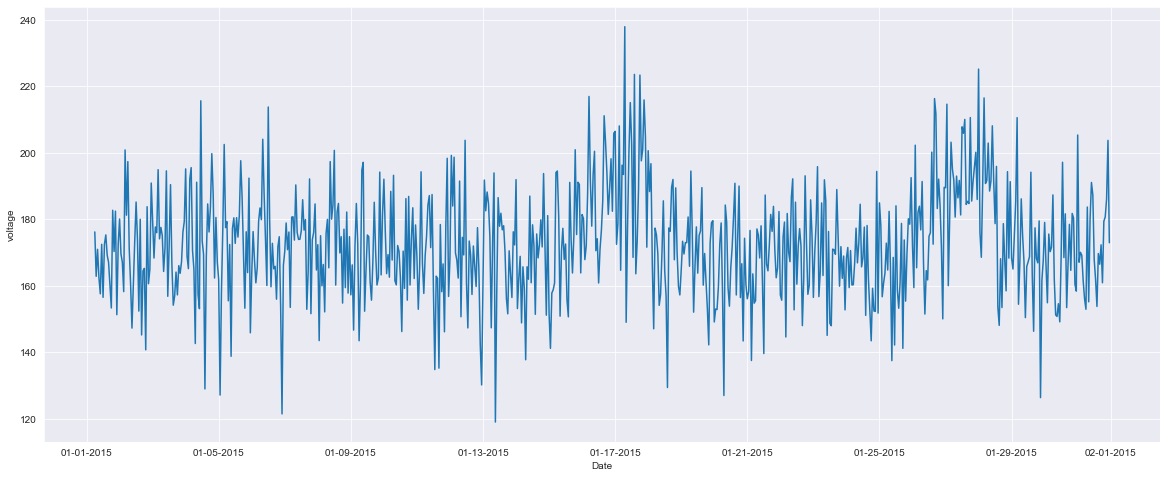

In [29]:
%matplotlib inline


plot_df = telemetry.loc[(telemetry['machineID'] == 1) & 
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) & 
                        (telemetry['datetime'] <pd.to_datetime('2015-02-01')),
                        ['datetime','volt']]
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Date')

In [30]:
# format of datetime field which comes in as string
errors['datetime'] = pd.to_datetime(errors['datetime'],format = '%Y-%m-%d %H:%M:%S')
errors['errorID'] = errors['errorID'].astype('category')
print("Total Number of error records: %d" %len(errors.index))
errors.head()

Total Number of error records: 3919


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


error1    1010
error2     988
error3     838
error4     727
error5     356
Name: errorID, dtype: int64

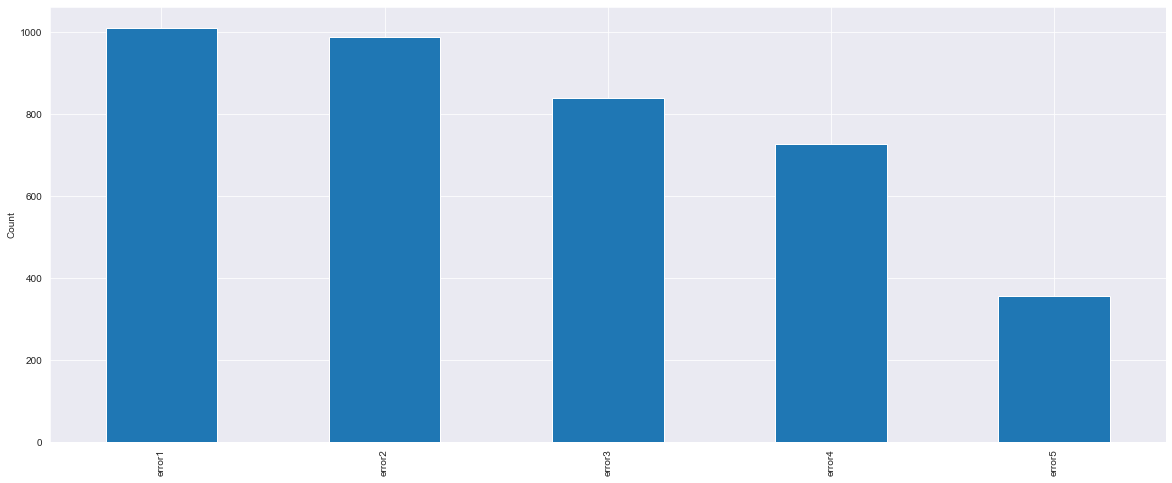

In [5]:
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
errors['errorID'].value_counts().plot(kind='bar')
plt.ylabel('Count')
errors['errorID'].value_counts()

In [6]:
maint['datetime'] = pd.to_datetime(maint['datetime'], format='%Y-%m-%d %H:%M:%S')
maint['comp'] = maint['comp'].astype('category')
print("Total Number of maintenance Records: %d" %len(maint.index))
maint.head()

Total Number of maintenance Records: 3286


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


comp2    863
comp4    811
comp3    808
comp1    804
Name: comp, dtype: int64

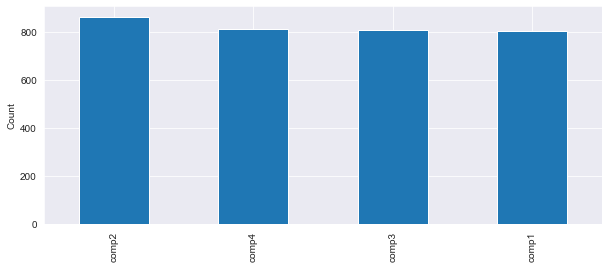

In [6]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
maint['comp'].value_counts().plot(kind='bar')
plt.ylabel('Count')
maint['comp'].value_counts()

comp2    863
comp4    811
comp3    808
comp1    804
Name: comp, dtype: int64

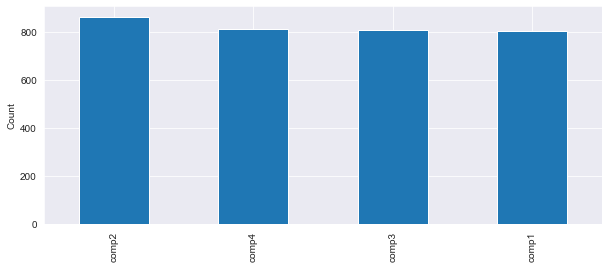

In [7]:
machines['model'] = machines['model'].astype('category')

print("Total number of machines: %d" % len(machines.index))
machines.head()

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 6))
_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()

In [6]:
telemetry.dtypes

datetime      object
machineID      int64
volt         float64
rotate       float64
pressure     float64
vibration    float64
dtype: object

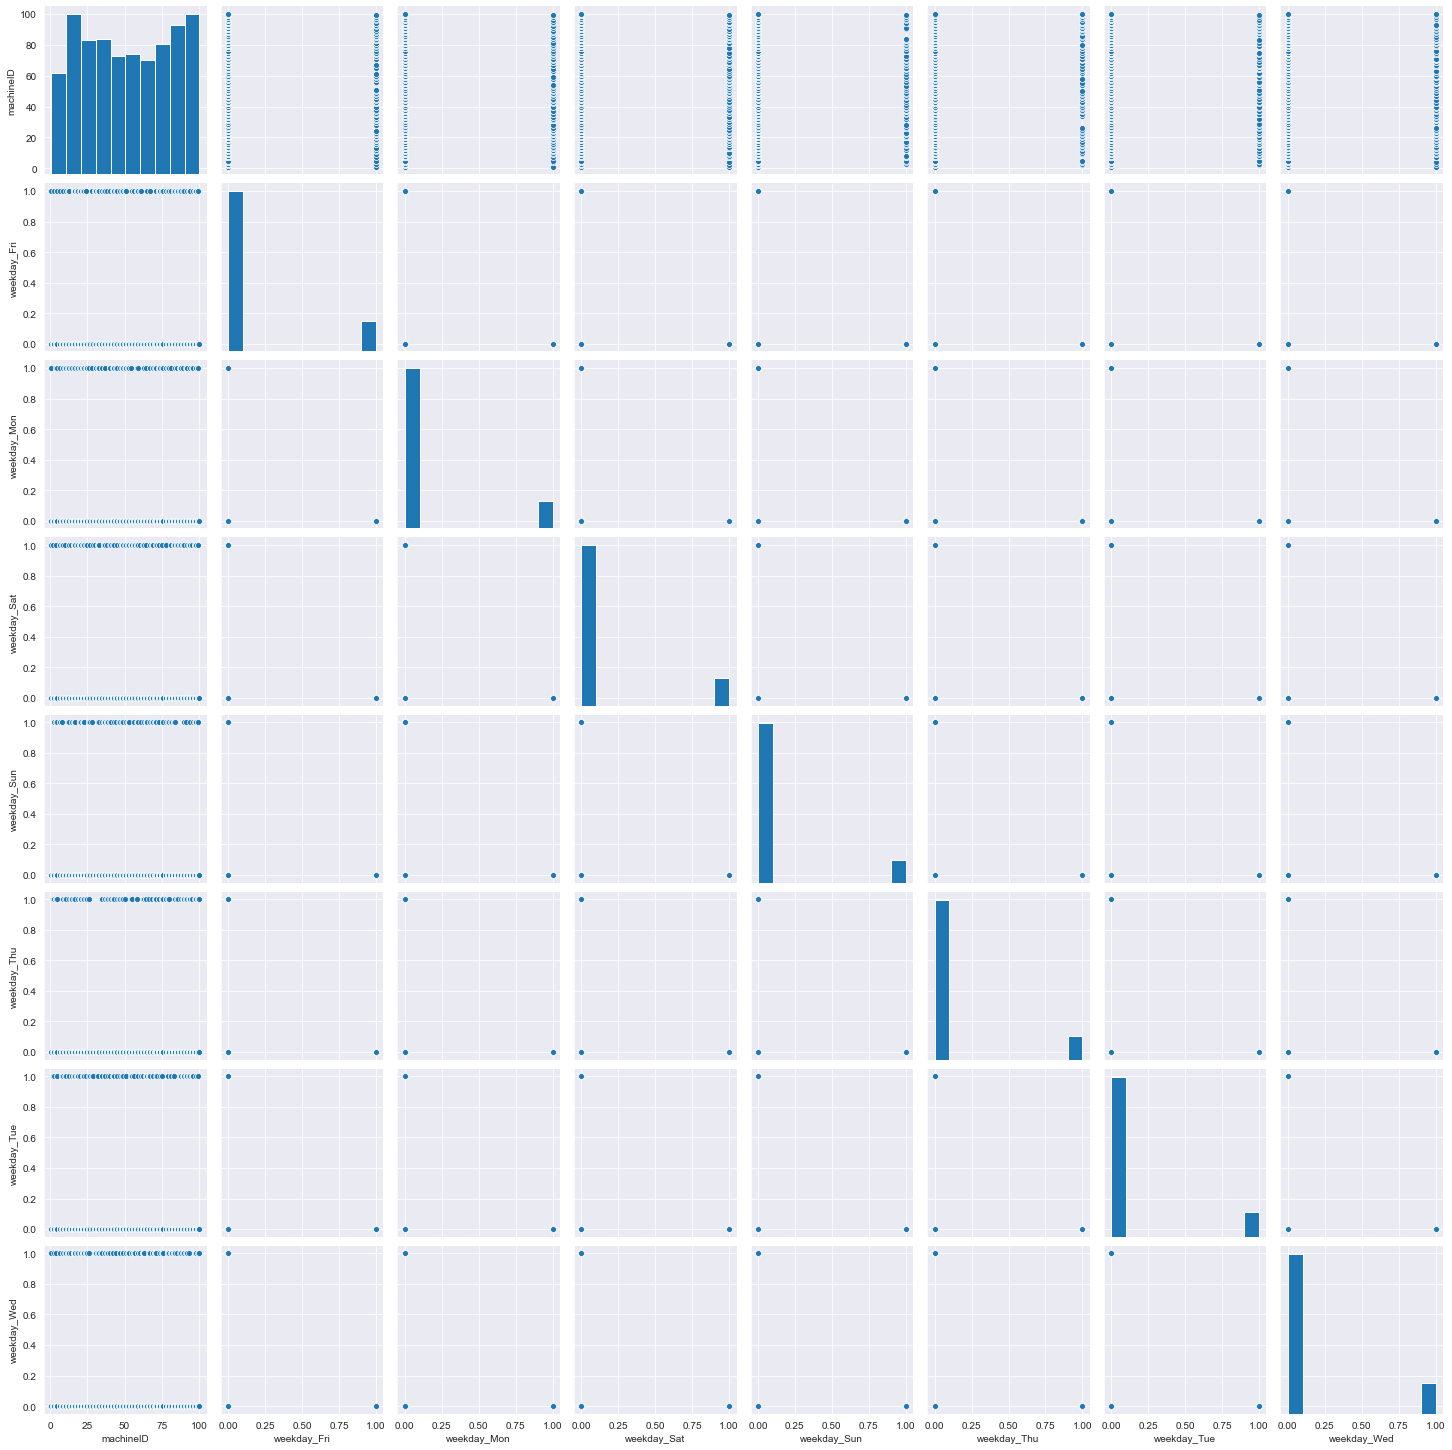

In [31]:
sns.pairplot(failures)

<AxesSubplot:>

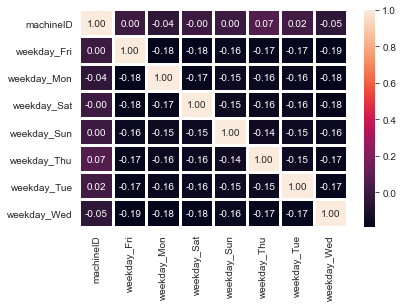

In [32]:
sns.heatmap(failures.corr(), annot=True, fmt='.2f', linewidths=2)